In [84]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings('ignore')

In [85]:
df=pd.read_csv("census_income.csv")

In [86]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [87]:
from sklearn.preprocessing import LabelEncoder

In [88]:
le=LabelEncoder()

In [89]:
df['Workclass']=le.fit_transform(df["Workclass"])
df['Education']=le.fit_transform(df["Education"])
df['Marital_status']=le.fit_transform(df["Marital_status"])
df['Occupation']=le.fit_transform(df["Occupation"])
df['Relationship']=le.fit_transform(df["Relationship"])
df['Race']=le.fit_transform(df["Race"])
df['Sex']=le.fit_transform(df["Sex"])
df['Native_country']=le.fit_transform(df["Native_country"])
df['Income']=le.fit_transform(df["Income"])

In [90]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32558,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


In [91]:
from sklearn.preprocessing import MinMaxScaler

In [92]:
mms=MinMaxScaler()

In [93]:
mms.fit_transform(df)

array([[0.45205479, 0.75      , 0.0482376 , ..., 0.12244898, 0.95121951,
        0.        ],
       [0.28767123, 0.5       , 0.13811345, ..., 0.39795918, 0.95121951,
        0.        ],
       [0.49315068, 0.5       , 0.15106831, ..., 0.39795918, 0.95121951,
        0.        ],
       ...,
       [0.56164384, 0.5       , 0.09482688, ..., 0.39795918, 0.95121951,
        0.        ],
       [0.06849315, 0.5       , 0.12849934, ..., 0.19387755, 0.95121951,
        0.        ],
       [0.47945205, 0.625     , 0.18720338, ..., 0.39795918, 0.95121951,
        1.        ]])

In [94]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32558,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


In [95]:
df.shape

(32560, 15)

In [96]:
df.dtypes

Age               int64
Workclass         int32
Fnlwgt            int64
Education         int32
Education_num     int64
Marital_status    int32
Occupation        int32
Relationship      int32
Race              int32
Sex               int32
Capital_gain      int64
Capital_loss      int64
Hours_per_week    int64
Native_country    int32
Income            int32
dtype: object

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             32560 non-null  int64
 1   Workclass       32560 non-null  int32
 2   Fnlwgt          32560 non-null  int64
 3   Education       32560 non-null  int32
 4   Education_num   32560 non-null  int64
 5   Marital_status  32560 non-null  int32
 6   Occupation      32560 non-null  int32
 7   Relationship    32560 non-null  int32
 8   Race            32560 non-null  int32
 9   Sex             32560 non-null  int32
 10  Capital_gain    32560 non-null  int64
 11  Capital_loss    32560 non-null  int64
 12  Hours_per_week  32560 non-null  int64
 13  Native_country  32560 non-null  int32
 14  Income          32560 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 2.6 MB


In [98]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

<AxesSubplot:>

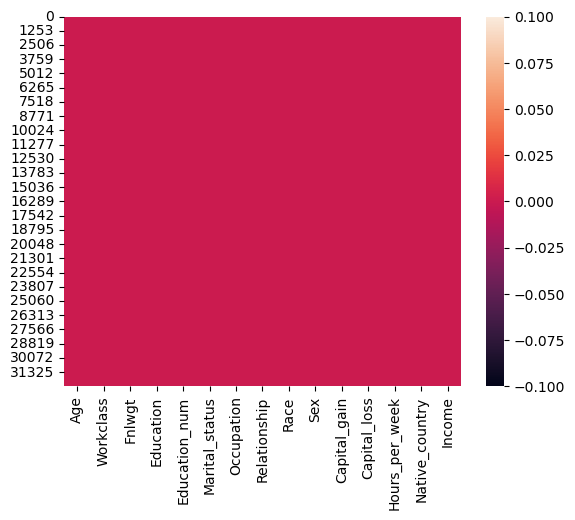

In [99]:
sns.heatmap(df.isnull())

In [100]:
df.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.003786,-0.076646,-0.010508,0.036527,-0.266292,-0.020946,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.001151,0.234039
Workclass,0.003786,1.000000,-0.016587,0.023537,0.052015,-0.064798,0.255004,-0.090449,0.049720,0.095942,0.033828,0.012231,0.138974,-0.007710,0.051645
Fnlwgt,-0.076646,-0.016587,1.000000,-0.028156,-0.043159,0.028184,0.001554,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.051957,-0.009481
Education,-0.010508,0.023537,-0.028156,1.000000,0.359172,-0.038398,-0.021274,-0.010879,0.014135,-0.027349,0.030047,0.016744,0.055510,0.064291,0.079311
Education_num,0.036527,0.052015,-0.043159,0.359172,1.000000,-0.069338,0.109748,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.050831,0.335182
Marital_status,-0.266292,-0.064798,0.028184,-0.038398,-0.069338,1.000000,-0.009617,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.023827,-0.199295
Occupation,-0.020946,0.255004,0.001554,-0.021274,0.109748,-0.009617,1.000000,-0.075620,0.006779,0.080328,0.025511,0.017979,0.080384,-0.012532,0.075448
Relationship,-0.263698,-0.090449,0.008922,-0.010879,-0.094145,0.185461,-0.075620,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.005504,-0.250924
Race,0.028718,0.049720,-0.021278,0.014135,0.031825,-0.068025,0.006779,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.137849,0.071853
Sex,0.088832,0.095942,0.026882,-0.027349,0.012256,-0.129337,0.080328,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,-0.008125,0.215995


<AxesSubplot:>

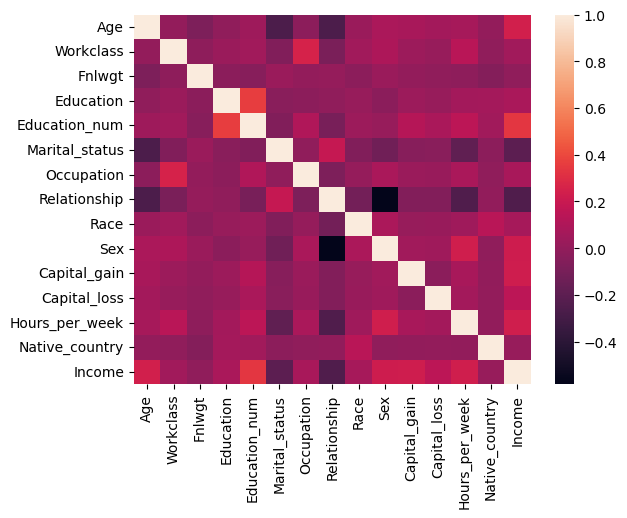

In [101]:
sns.heatmap(df.corr())

No negative correlation of income with any columns in dataset (df)

In [102]:
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.868796,1.897818e+05,10.298249,10.080590,2.611794,6.572912,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.718796,0.240817
std,13.640642,1.455879,1.055498e+05,3.870317,2.572709,1.506225,4.228809,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,7.823892,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783630e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.370545e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


key observations-

1- No skewness in datasets as mean is not more then median(50%).

2- outliers are present in data(df) as there is difference in 75% and max

In [103]:
df.skew()

Age                0.558738
Workclass         -0.752280
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -3.658235
Income             1.212383
dtype: float64

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

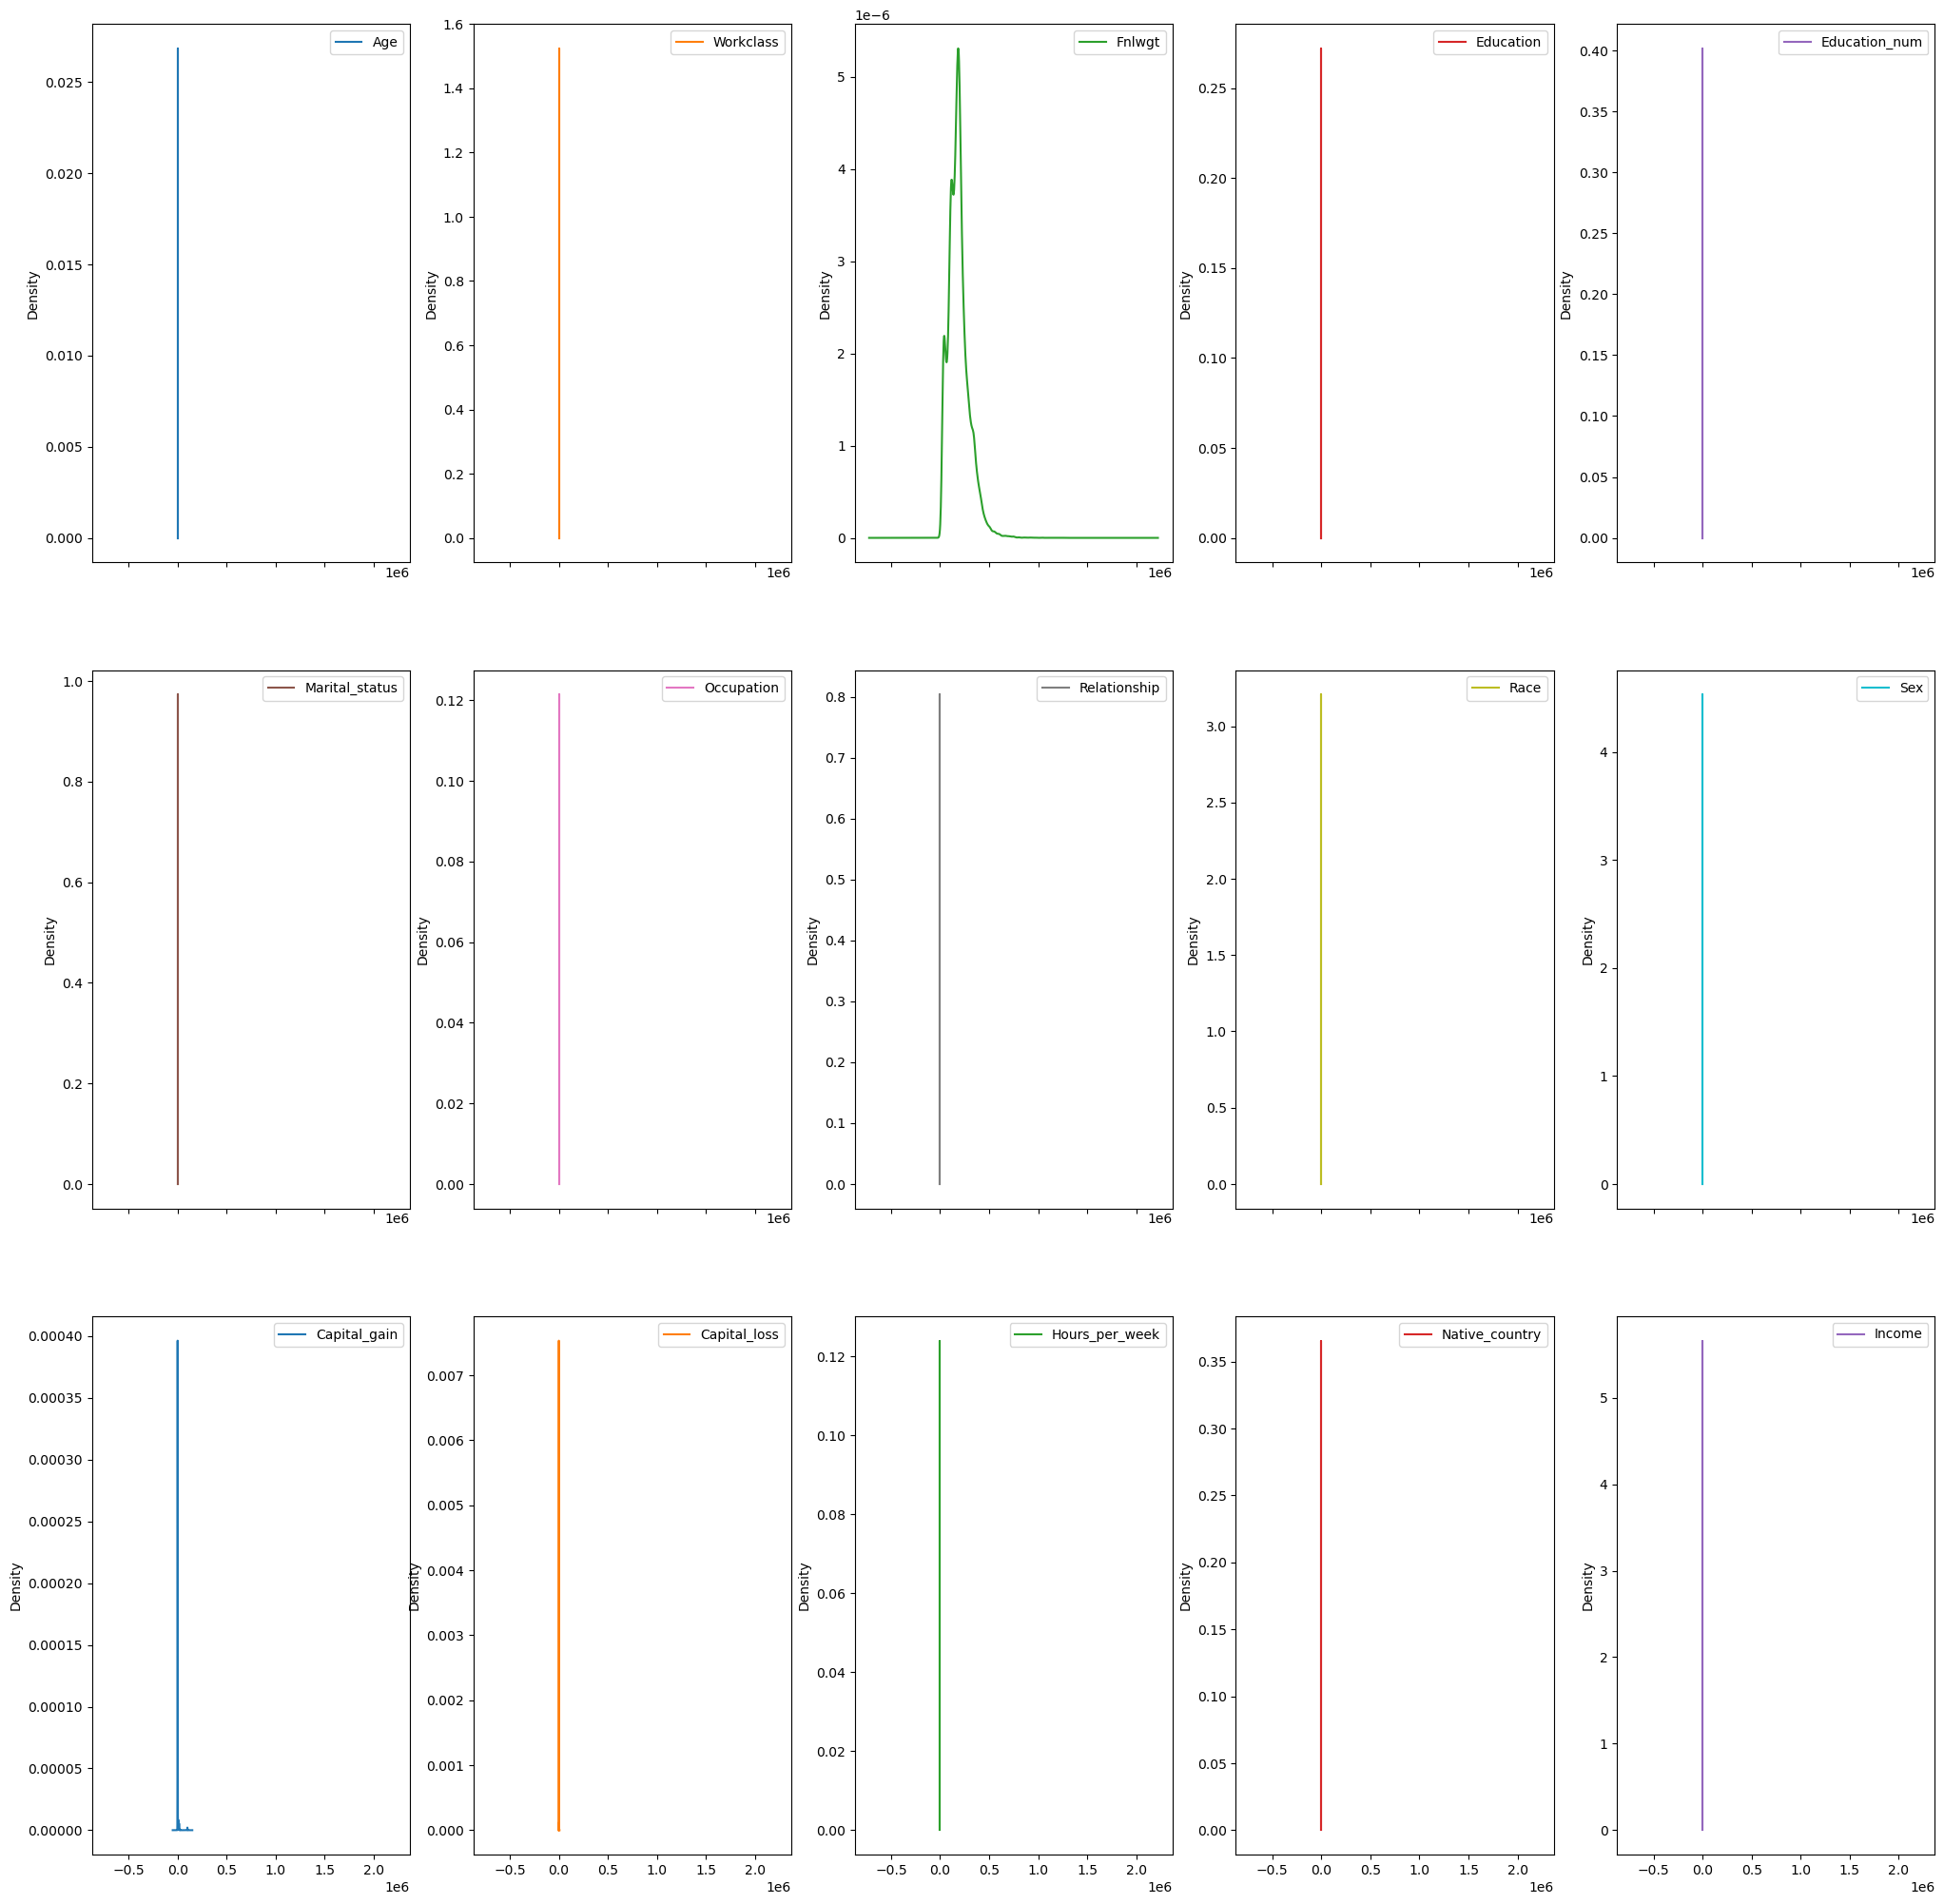

In [104]:
df.plot(kind="kde",subplots=True,layout=(3,5),figsize=(25,25))

<AxesSubplot:xlabel='Capital_gain', ylabel='Density'>

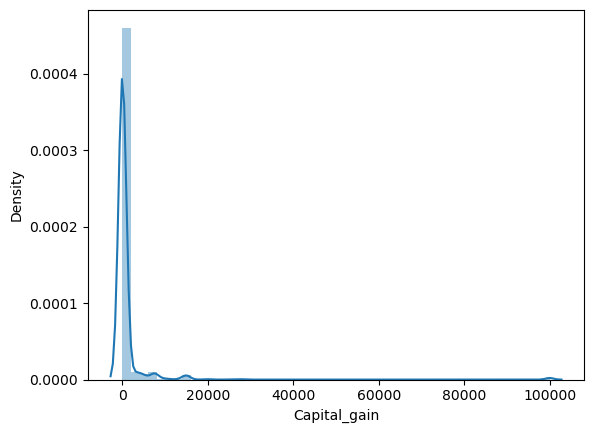

In [105]:
sns.distplot(df["Capital_gain"])

No skewness is present in dataset(df)

Age                  AxesSubplot(0.125,0.653529;0.133621x0.226471)
Workclass         AxesSubplot(0.285345,0.653529;0.133621x0.226471)
Fnlwgt             AxesSubplot(0.44569,0.653529;0.133621x0.226471)
Education         AxesSubplot(0.606034,0.653529;0.133621x0.226471)
Education_num     AxesSubplot(0.766379,0.653529;0.133621x0.226471)
Marital_status       AxesSubplot(0.125,0.381765;0.133621x0.226471)
Occupation        AxesSubplot(0.285345,0.381765;0.133621x0.226471)
Relationship       AxesSubplot(0.44569,0.381765;0.133621x0.226471)
Race              AxesSubplot(0.606034,0.381765;0.133621x0.226471)
Sex               AxesSubplot(0.766379,0.381765;0.133621x0.226471)
Capital_gain             AxesSubplot(0.125,0.11;0.133621x0.226471)
Capital_loss          AxesSubplot(0.285345,0.11;0.133621x0.226471)
Hours_per_week         AxesSubplot(0.44569,0.11;0.133621x0.226471)
Native_country        AxesSubplot(0.606034,0.11;0.133621x0.226471)
Income                AxesSubplot(0.766379,0.11;0.133621x0.226

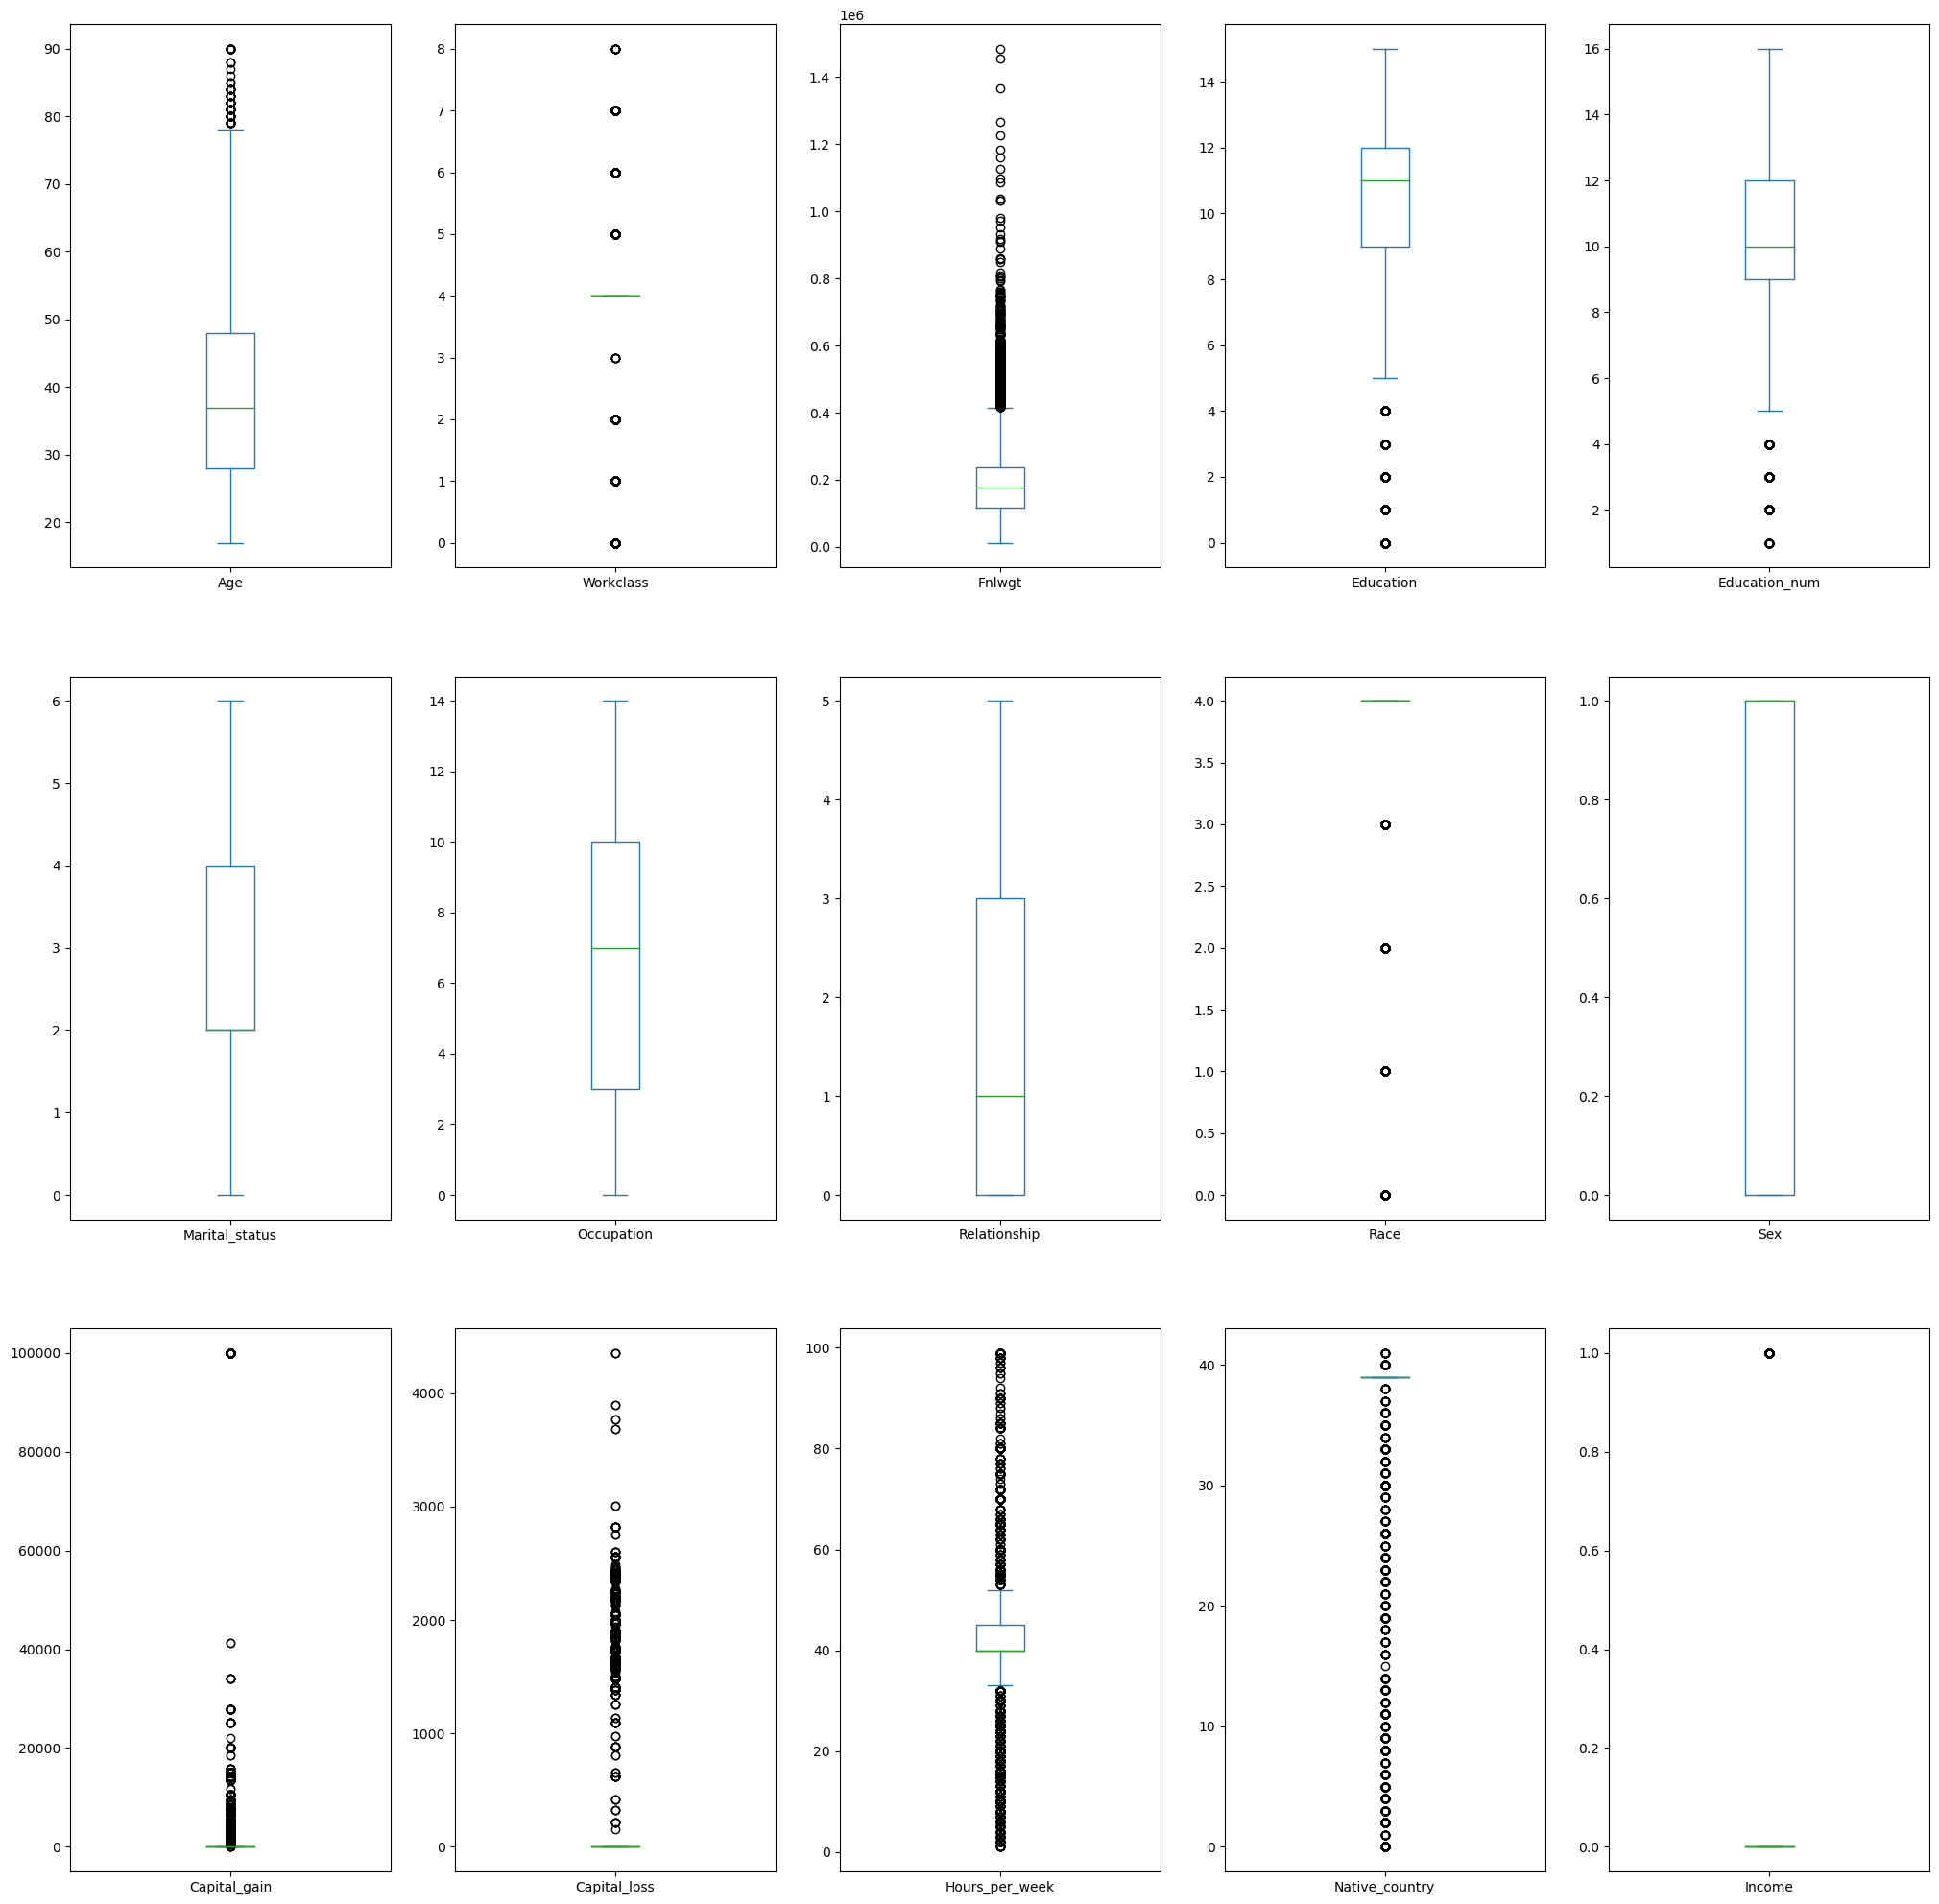

In [106]:
df.plot(kind="box",subplots=True,layout=(3,5),figsize=(25,25))

In [107]:
from scipy.stats import zscore

In [108]:
z=np.abs(zscore(df))

In [109]:
z

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,0.837097,1.463883,1.008742,0.335443,1.134779,0.406183,0.608434,0.900177,0.393675,0.703087,0.145914,0.216663,2.222120,0.291573,0.563210
1,0.042640,0.090121,0.245046,0.181319,0.420027,1.734026,0.135480,0.277810,0.393675,0.703087,0.145914,0.216663,0.035430,0.291573,0.563210
2,1.057031,0.090121,0.425770,2.402489,1.197429,0.406183,0.135480,0.900177,1.962583,0.703087,0.145914,0.216663,0.035430,0.291573,0.563210
3,0.775755,0.090121,1.408146,0.335443,1.134779,0.406183,0.810427,2.211658,1.962583,1.422298,0.145914,0.216663,0.035430,4.054157,0.563210
4,0.115952,0.090121,0.898170,0.439700,1.523480,0.406183,0.608434,2.211658,0.393675,1.422298,0.145914,0.216663,0.035430,0.291573,0.563210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,0.849066,0.090121,0.639710,0.852204,0.746077,0.406183,1.519858,2.211658,0.393675,1.422298,0.145914,0.216663,0.197407,0.291573,0.563210
32556,0.103982,0.090121,0.335466,0.181319,0.420027,0.406183,0.100997,0.900177,0.393675,0.703087,0.145914,0.216663,0.035430,0.291573,1.775537
32557,1.423589,0.090121,0.358811,0.181319,0.420027,2.249503,1.317864,1.589291,0.393675,1.422298,0.145914,0.216663,0.035430,0.291573,0.563210
32558,1.215624,0.090121,0.110927,0.181319,0.420027,0.921660,1.317864,0.966924,0.393675,0.703087,0.145914,0.216663,1.655200,0.291573,0.563210


In [110]:
Threashold=3
print(np.where(z>3))

(array([    3,     9,    10, ..., 32532, 32550, 32552], dtype=int64), array([13, 12,  8, ...,  8,  8,  8], dtype=int64))


In [124]:
df_n=df[(z<3).all(axis=1)]

In [125]:
df_n.shape

(27417, 15)

In [126]:
df=df_n

In [128]:
x=df.iloc[:,0:-1]

In [129]:
x.shape

(27417, 14)

In [179]:
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,50.0,6,83311.0,9,13.0,2,4,0,4.0,1,0.0,0.0,13.0,39.0
1,38.0,4,215646.0,11,9.0,0,6,1,4.0,1,0.0,0.0,40.0,39.0
2,53.0,4,234721.0,1,7.0,2,6,0,2.0,1,0.0,0.0,40.0,39.0
4,37.0,4,284582.0,12,14.0,2,4,5,4.0,0,0.0,0.0,40.0,39.0
5,49.0,4,160187.0,6,5.0,3,8,1,2.0,0,0.0,0.0,16.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27.0,4,257302.0,7,12.0,2,13,5,4.0,0,0.0,0.0,38.0,39.0
32556,40.0,4,154374.0,11,9.0,2,7,0,4.0,1,0.0,0.0,40.0,39.0
32557,58.0,4,151910.0,11,9.0,6,1,4,4.0,0,0.0,0.0,40.0,39.0
32558,22.0,4,201490.0,11,9.0,4,1,3,4.0,1,0.0,0.0,20.0,39.0


In [131]:
y=df.iloc[:,-1]

In [132]:
y.shape

(27417,)

In [170]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.27,random_state=48)

In [171]:
xtrain.shape

(20014, 14)

In [172]:
ytrain.shape

(20014,)

In [173]:
lg=LogisticRegression()

In [174]:
lg.fit(xtrain,ytrain)

LogisticRegression()

In [175]:
lpred=lg.predict(xtest)

In [176]:
lpred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [177]:
lg.score(xtrain,ytrain)

0.797591685819926

In [178]:
print("Accuracy score",accuracy_score(ytest,lpred))
print("confusion matrix",confusion_matrix(ytest,lpred))
print("Classification report",classification_report(ytest,lpred))

Accuracy score 0.8071052276104282
confusion matrix [[5597  208]
 [1220  378]]
Classification report               precision    recall  f1-score   support

           0       0.82      0.96      0.89      5805
           1       0.65      0.24      0.35      1598

    accuracy                           0.81      7403
   macro avg       0.73      0.60      0.62      7403
weighted avg       0.78      0.81      0.77      7403



In [180]:
p=np.array([50.0,6,83311.0,9,13.0,2,4,0,4.0,1,0.0,0.0,13.0,39.0])

In [181]:
p=p.reshape(1,-1)

In [182]:
lg.predict(p)

array([0], dtype=int64)

The model is predicting the exect value

hence model is working fine for income prediction